## Thoughts on the Network

* Created the  architecture in such a way that all the layers with same channels i.e. 10 for two layers and next with 16 channels and each layer BatchNormalization and dropout and we are convoluting till we reach 7 channels since after that it will waste to convolute as all the digits would be captured by that
* In this architecture the parameters got reduced and since we are using dropout we will not be facing overfitting problem
*I have introduced the learning rate in this and batch_size has been increased to 256 
*Accuracy has been improved a way better than the other 3 DNNs



In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Import the required libraries
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
#Load the Mnist data and split the data into Train and Test dataframes
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


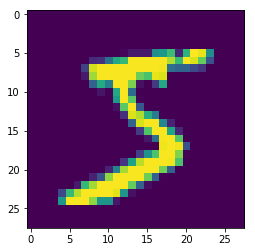

In [0]:
# Print the shape of the mnist train data and plot first image in the mnist train data
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# Reshape the train and test dataframes
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
#print the 0 to 10 array values present in the y_train
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
#building the architecture
from keras.layers import Activation
from keras.layers import BatchNormalization,Dropout
model = Sequential()

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) 
#model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Convolution2D(10, 3, 3, activation= 'relu'))
#model.add(Convolution2D(10, 1, 1, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Convolution2D(16, 3, 3, activation= 'relu'))
#model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(10, 3, 3, activation= 'relu'))
#model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Convolution2D(16, 3, 3, activation= 'relu'))
#model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Convolution2D(10, 7, 7))

#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_laun

In [0]:
#Print the summary of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_33 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_36 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_34 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
dropout_37 (Dropout)         (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 22, 22, 16)        1456      
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:
#Fit the model with batch size as 32 and run epochs 10 and also check the validation accuracy in this step
model.fit(X_train, Y_train, batch_size=256, nb_epoch=20, verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
  256/60000 [..............................] - ETA: 46s - loss: 0.0368 - acc: 0.9844

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 4s 69us/step - loss: 0.0365 - acc: 0.9884 - val_loss: 0.0265 - val_acc: 0.9915
Epoch 2/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0372 - acc: 0.9879 - val_loss: 0.0264 - val_acc: 0.9914
Epoch 3/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0356 - acc: 0.9878 - val_loss: 0.0268 - val_acc: 0.9915
Epoch 4/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0352 - acc: 0.9886 - val_loss: 0.0285 - val_acc: 0.9902
Epoch 5/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0351 - acc: 0.9885 - val_loss: 0.0328 - val_acc: 0.9895
Epoch 6/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0360 - acc: 0.9885 - val_loss: 0.0345 - val_acc: 0.9888
Epoch 7/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0341 - acc: 0.9884 - val_loss: 0.0310 - val_acc: 0.9905
Epoch 8/20
60000/60000 [============================

In [0]:
#Evaluate the test dataset
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
#print the test scores
print(score)

[0.04048466449171537, 0.9881]


In [0]:
#predict the test dataset
y_pred = model.predict(X_test)


In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.2100675e-10 6.3314696e-09 7.6741138e-08 3.2360597e-07 1.6918297e-10
  4.5259133e-10 3.5896837e-12 9.9999785e-01 5.1954324e-10 1.7353067e-06]
 [7.7619756e-05 2.1433672e-04 9.9970573e-01 6.9557103e-08 2.9346795e-08
  5.6877197e-11 1.6964066e-06 2.8463333e-07 2.5143814e-08 6.2051967e-08]
 [9.3087905e-08 9.9998724e-01 9.4463837e-07 1.9336037e-09 7.2234830e-06
  1.7934841e-08 7.6022855e-07 2.2089473e-06 9.7866950e-07 4.6501009e-07]
 [9.9818748e-01 3.1751380e-08 9.6063275e-08 1.2128525e-07 1.3256675e-06
  6.2184508e-06 1.7290172e-03 1.8909849e-06 1.5913139e-06 7.2159142e-05]
 [5.2080418e-10 1.0447092e-08 5.5608967e-10 5.4491255e-11 9.9992704e-01
  4.2089457e-10 1.3931893e-08 4.1674861e-10 2.0792450e-09 7.2892617e-05]
 [2.0461749e-07 9.9998951e-01 7.1405242e-07 4.4387943e-10 5.9953491e-06
  5.2684674e-09 7.0388774e-07 1.3179205e-06 1.0338599e-06 4.6543394e-07]
 [1.8007904e-15 1.3977919e-07 2.6674346e-10 2.3294309e-12 9.9999940e-01
  1.5710529e-10 4.4096198e-12 9.8867865e-09 4.4100492e-08 